In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('fatal-police-shootings-data.csv')

print(data.head())

   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing      

In [5]:
pivot_table = pd.pivot_table(data, index='race', columns='signs_of_mental_illness', aggfunc='size', fill_value=0)

print(pivot_table)

signs_of_mental_illness  False  True 
race                                 
A                           69     24
B                         1114    184
H                          745    157
N                           64     14
O                           37     11
W                         1763    713


In [7]:
pivot_table = pd.pivot_table(data, index='race', columns='signs_of_mental_illness', aggfunc='size', fill_value=0)
pivot_table['Percent_with_Mental_Illness'] = pivot_table.apply(lambda row: (row[True] / (row[True] + row[False])) * 100, axis=1)
najwyzszy_odsetek_rasy = pivot_table['Percent_with_Mental_Illness'].idxmax()
najwyzszy_odsetek = pivot_table['Percent_with_Mental_Illness'].max()

print(pivot_table)
print("\nRasa z największym odsetkiem znamion choroby psychicznej: {}, Odsetek: {:.2f}%".format(najwyzszy_odsetek_rasy, najwyzszy_odsetek))

signs_of_mental_illness  False  True  Percent_with_Mental_Illness
race                                                             
A                           69    24                    25.806452
B                         1114   184                    14.175655
H                          745   157                    17.405765
N                           64    14                    17.948718
O                           37    11                    22.916667
W                         1763   713                    28.796446

Rasa z największym odsetkiem znamion choroby psychicznej: W, Odsetek: 28.80%


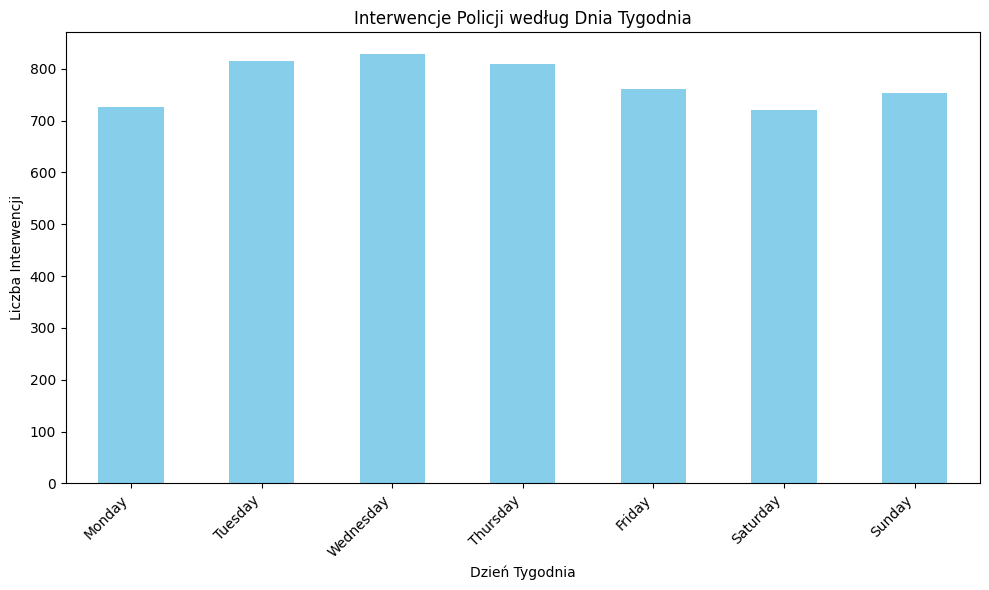

In [9]:
data['date'] = pd.to_datetime(data['date'])
data['Day_of_Week'] = data['date'].dt.day_name()
interwencje = data['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


plt.figure(figsize=(10, 6))
interwencje.plot(kind='bar', color='skyblue')
plt.title('Interwencje Policji według Dnia Tygodnia')
plt.xlabel('Dzień Tygodnia')
plt.ylabel('Liczba Interwencji')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
stany = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
populacja = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

stany = stany.iloc[:, [0, 5]] if isinstance(stany, pd.DataFrame) else stany[0].iloc[:, [0, 5]]
populacja = populacja.iloc[:, [2, 3]] if isinstance(populacja, pd.DataFrame) else populacja[0].iloc[:, [2, 3]]
stany.columns = ['State', 'Abbreviation']
populacja.columns = ['State', 'Population']

merged_data = pd.merge(stany, populacja, on='State')
merged_data = pd.merge(merged_data, data.groupby('state').count()['id'].reset_index(), left_on='Abbreviation', right_on='state')
merged_data.rename(columns={'id': 'Quantity'}, inplace=True)
merged_data['Incidents_per_1000'] = (merged_data['Quantity'] / merged_data['Population']) * 1000

print(merged_data)

                   State Abbreviation  Population state  Quantity  \
0                Alabama           AL     5024279    AL       104   
1                 Alaska           AK      733391    AK        39   
2                Arizona           AZ     7151502    AZ       254   
3               Arkansas           AR     3011524    AR        83   
4             California           CA    39538223    CA       799   
5               Colorado           CO     5773714    CO       195   
6            Connecticut           CT     3605944    CT        21   
7               Delaware           DE      989948    DE        13   
8   District of Columbia           DC      689545    DC        13   
9                Florida           FL    21538187    FL       350   
10               Georgia           GA    10711908    GA       182   
11                Hawaii           HI     1455271    HI        30   
12                 Idaho           ID     1839106    ID        42   
13              Illinois          